# CNN

In [6]:
import numpy as np
import matplotlib.pyplot as plt 


In [7]:
!pip install tensorflow

## Fashion MNIST

In [8]:
from tensorflow.keras.datasets import fashion_mnist

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

In [13]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [14]:
np.max(X_train)

255

In [15]:
np.max(X_test)

255

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [18]:
labels = ["Tshirt" ,"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

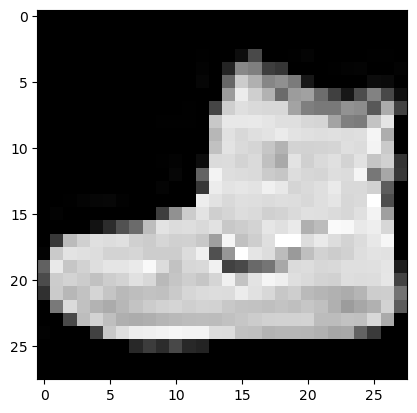

In [19]:
plt.imshow(np.squeeze(X_train[0]), cmap="gray")

In [20]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

In [21]:
len(X_train)

60000

In [22]:
percentage_cut = 1

In [23]:
int(len(X_train)* percentage_cut)

60000

In [24]:
idx_train = np.random.choice(len(X_train), int(len(X_train) * percentage_cut))

In [25]:
len(idx_train)

60000

In [26]:
idx_test = np.random.choice(len(X_test), int(len(X_test) * percentage_cut))

In [27]:
len(idx_test)

10000

In [28]:
X_train_small = X_train[idx_train]
X_test_small = X_train[idx_test]

In [29]:
X_train_small.shape

(60000, 28, 28, 1)

In [30]:
X_test_small.shape

(10000, 28, 28, 1)

In [31]:
y_train_small = y_train[idx_train]
y_test_small = y_test[idx_test]

In [32]:
y_train_cat_small = y_train_cat[idx_train]
y_test_cat_small = y_test_cat[idx_test]

In [33]:
from tensorflow.keras import Sequential, layers, models

In [34]:
X_train_small[0].shape

(28, 28, 1)

In [35]:
''' less than 400_000'''

def my_cnn():

    model = Sequential()

    model.add(layers.Conv2D(256, kernel_size = (3,3), activation ="relu",input_shape = X_train_small[0].shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, kernel_size = (3,3), activation ="relu"))

    model.add(layers.Conv2D(64, kernel_size = (3,3), activation ="relu"))


    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(10,activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    
    return model



In [36]:
model = my_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 16)                82960     
                                                        

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, monitor = "val_accuracy", restore_best_weights = True)


history = model.fit(X_train_small, y_train_cat_small,
                   validation_split=0.2, shuffle = True,
                   batch_size = 32, 
                   epochs = 100, # upload it to Colab, change the number of epochs to 500, 1_00
                   callbacks = [es])

Epoch 1/100
 257/1500 [====>.........................] - ETA: 3:28 - loss: 1.6804 - accuracy: 0.3799

KeyboardInterrupt: 

In [ ]:
res = model.evaluate(X_test_small, y_test_cat_small)

In [ ]:
predicted_probabilities = model.predict(X_test_small)

In [ ]:
predicted_probabilities.shape

In [ ]:
def prediction_from_probabilities(probabilities):
    return np.argmax(probabilities)

In [ ]:
y_pred = np.apply_along_axis(prediction_from_probabilities,1, predicted_probabilities)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_small,y_pred)
cm


## CIFAR 10

In [38]:
from tensorflow.keras.datasets import cifar10

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

170498071/170498071 [==============================] - 26s 0us/step


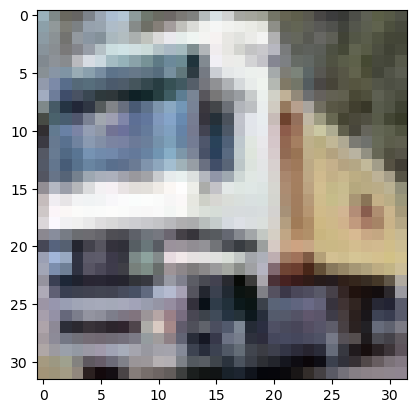

In [39]:
plt.imshow(images_train[1])

In [40]:
images_train.shape

(50000, 32, 32, 3)

In [41]:
images_test.shape

(10000, 32, 32, 3)

In [42]:
images_train = images_train / 255
images_test = images_test / 255

In [43]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [44]:
labels_train_cat = to_categorical(labels_train)
labels_test_cat = to_categorical(labels_test)

In [45]:
np.unique(labels_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [46]:
np.unique(labels_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [47]:
percentage_cut = 0.1

idx_train = np.random.choice(len(images_train), int(len(images_train)*percentage_cut))
idx_test = np.random.choice(len(images_test), int(len(images_test)*percentage_cut))

images_train_small = images_train[idx_train]
labels_train_small = labels_train[idx_train]
labels_train_cat_small = labels_train_cat[idx_train]

images_test_small = images_test[idx_test]
labels_test_small = labels_test[idx_test]
labels_test_cat_small = labels_test_cat[idx_test]

In [48]:
images_train_small[0].shape

(32, 32, 3)

In [49]:
''' less than 400_000'''

def my_cnn():

    model = Sequential()

    model.add(layers.Conv2D(256, kernel_size = (3,3), activation ="relu",input_shape = images_train_small[0].shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, kernel_size = (3,3), activation ="relu"))

    model.add(layers.Conv2D(64, kernel_size = (3,3), activation ="relu"))


    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(10,activation="softmax"))

    model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    
    return model



In [50]:
model = my_cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                123920    
                                                      

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, monitor = "val_accuracy", restore_best_weights = True)


history = model.fit(images_train_small, labels_train_cat_small,
                   validation_split=0.2, shuffle = True,
                   batch_size = 32, 
                   epochs = 100, # please run it on colab
                   callbacks = [es])

Epoch 1/100
 38/125 [========>.....................] - ETA: 16s - loss: 2.3095 - accuracy: 0.0970

KeyboardInterrupt: 

In [ ]:
res = model.evaluate(images_test_small, y_test_cat_small)

In [ ]:
predicted_probabilities = model.predict(images_test_small)

In [ ]:
y_pred = np.apply_along_axis(prediction_from_probabilities,1, predicted_probabilities)

In [ ]:
cm = confusion_matrix(y_test_small, y_pred)

## VGG16 : `transfer learning`

In [52]:
images_train_small[0].shape

(32, 32, 3)

In [53]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights="imagenet", include_top = False, input_shape = images_train[0].shape)

58889256/58889256 [==============================] - 9s 0us/step


In [54]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [55]:
vgg16.trainable = False

In [56]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [57]:
flatten_layer = layers.Flatten()
first_dense_layer = layers.Dense(128, activation = "relu")
hidden_layer_1 = layers.Dense(64, activation = "relu")
hidden_layer_2 = layers.Dense(32, activation = "relu")
hidden_layer_3 = layers.Dense(16, activation = "relu")
prediction_layer = layers.Dense(10, activation = "softmax")

In [58]:
my_customized_vgg16 = models.Sequential([
    vgg16,
    flatten_layer,
    first_dense_layer,
    hidden_layer_1,
    hidden_layer_2,
    hidden_layer_3,
    prediction_layer
])

my_customized_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 10)               

In [59]:
my_customized_vgg16.compile(loss = "categorical_crossentropy",
                           optimizer = "adam",
                           metrics = ["accuracy"])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, monitor = "val_accuracy", restore_best_weights = True)


history_customized_vgg16 = my_customized_vgg16.fit(images_train_small, labels_train_cat_small,
                   validation_split=0.2, shuffle = True,
                   batch_size = 32, 
                   epochs = 100, # please run it on colab
                   callbacks = [es])



Epoch 1/100
125/125 [==============================] - 34s 260ms/step - loss: 2.0401 - accuracy: 0.2428 - val_loss: 1.8236 - val_accuracy: 0.3370
Epoch 2/100
125/125 [==============================] - 27s 214ms/step - loss: 1.6835 - accuracy: 0.3997 - val_loss: 1.6833 - val_accuracy: 0.4130
Epoch 3/100
125/125 [==============================] - 27s 213ms/step - loss: 1.5238 - accuracy: 0.4638 - val_loss: 1.5910 - val_accuracy: 0.4410
Epoch 4/100
125/125 [==============================] - 27s 217ms/step - loss: 1.3832 - accuracy: 0.5203 - val_loss: 1.5558 - val_accuracy: 0.4630
Epoch 5/100
125/125 [==============================] - 29s 230ms/step - loss: 1.2796 - accuracy: 0.5545 - val_loss: 1.4915 - val_accuracy: 0.4860
Epoch 6/100
125/125 [==============================] - 28s 228ms/step - loss: 1.1991 - accuracy: 0.5775 - val_loss: 1.4795 - val_accuracy: 0.5000
Epoch 7/100
125/125 [==============================] - 29s 236ms/step - loss: 1.1504 - accuracy: 0.5962 - val_loss: 1.4896 -

In [61]:
res_customized_vgg16 = my_customized_vgg16.evaluate(images_test_small, labels_test_cat_small)

32/32 [==============================] - 5s 165ms/step - loss: 1.5846 - accuracy: 0.5040


In [69]:
predicted_probabilities = my_customized_vgg16.predict(images_test_small)
predicted_probabilities[0]

32/32 [==============================] - 5s 165ms/step


array([5.5985614e-03, 2.3096236e-05, 1.5462068e-01, 1.0609010e-02,
       3.9771991e-03, 8.6686220e-03, 8.1577265e-01, 2.2572328e-04,
       4.8621921e-04, 1.8232438e-05], dtype=float32)

In [67]:
y_pred = np.argmax(predicted_probabilities, axis = 1)
len(y_pred)

1000

In [ ]:
cm = confusion_matrix(y_test_small, y_pred)